In [ ]:
#pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import LSTM, Dense , Dropout
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping


# FOR create files and folders for data saving
# File path for exported data
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes', 'no', 'please'])

# Fifty videos
no_sequences = 50

# 30 frames per video
sequence_length = 30







In [13]:
label_map = {label:num for num, label in enumerate(actions)}

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


x = np.array(sequences)

y = to_categorical(labels).astype(int) #use One-Hot Encoding method to represent y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

# model 2 success
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=500,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - acc: 0.1454 - loss: 1.6473 - val_acc: 0.2083 - val_loss: 1.5916
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.1619 - loss: 1.5900 - val_acc: 0.4167 - val_loss: 1.5788
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.2821 - loss: 1.5682 - val_acc: 0.2500 - val_loss: 1.4540
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.2018 - loss: 1.5178 - val_acc: 0.2083 - val_loss: 1.6138
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.1781 - loss: 1.6196 - val_acc: 0.2708 - val_loss: 1.6067
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.1674 - loss: 1.6073 - val_acc: 0.1875 - val_loss: 1.6038
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.2096 - loss: 1.6013 - val_acc: 0.1458 - val_loss: 1.5982
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.1879 - loss: 1.6150 - val_acc: 0.3542 - val_loss: 1.5843
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.2387 - loss: 

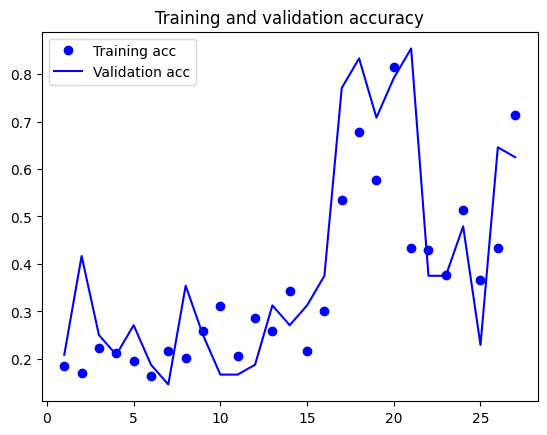

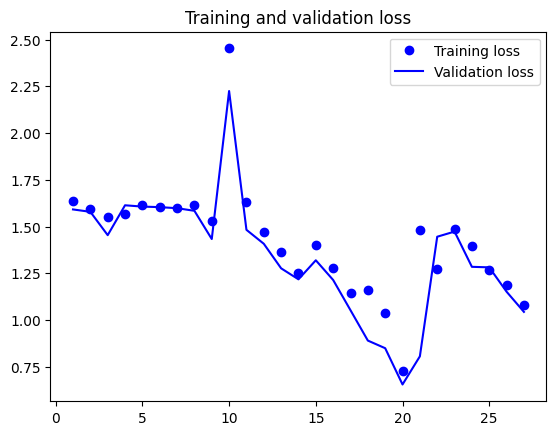

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.save('model2.h5')

In [32]:
from sklearn.metrics import classification_report

y_predic = model.predict(x_test)
y_predic = np.argmax(y_predic, axis=1)
ytrue = np.argmax(y_test, axis=1)

print(classification_report(ytrue, y_predic))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         1
           2       0.50      0.25      0.33         4
           3       0.33      0.50      0.40         2
           4       1.00      0.67      0.80         3

    accuracy                           0.54        13
   macro avg       0.47      0.48      0.44        13
weighted avg       0.55      0.54      0.50        13



C:\Users\LIM CHEE LEONG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LIM CHEE LEONG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LIM CHEE LEONG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [18]:
yhat = model.predict(x_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[[ 7,  3],
        [ 0,  3]],

       [[12,  0],
        [ 1,  0]],

       [[ 8,  1],
        [ 3,  1]],

       [[ 9,  2],
        [ 1,  1]],

       [[10,  0],
        [ 1,  2]]], dtype=int64)

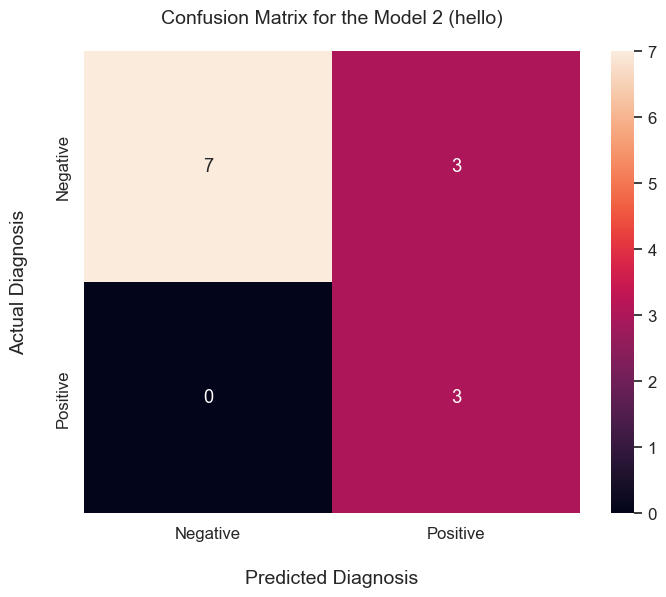

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[0], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 2 (hello)", fontsize=14, pad=20)
 
plt.show()

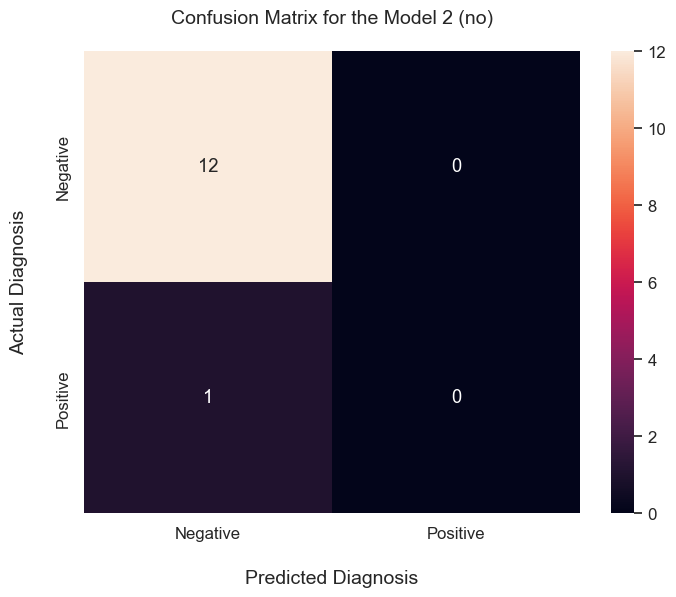

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[1], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 2 (no)", fontsize=14, pad=20)
 
plt.show()

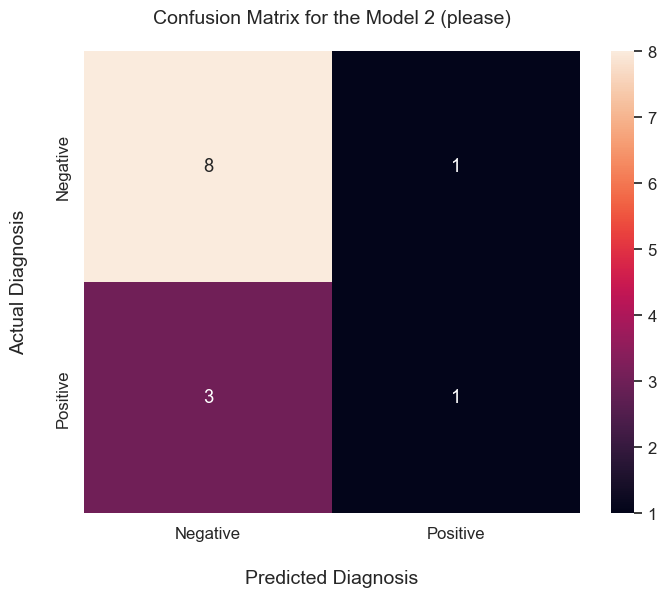

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[2], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 2 (please)", fontsize=14, pad=20)
 
plt.show()

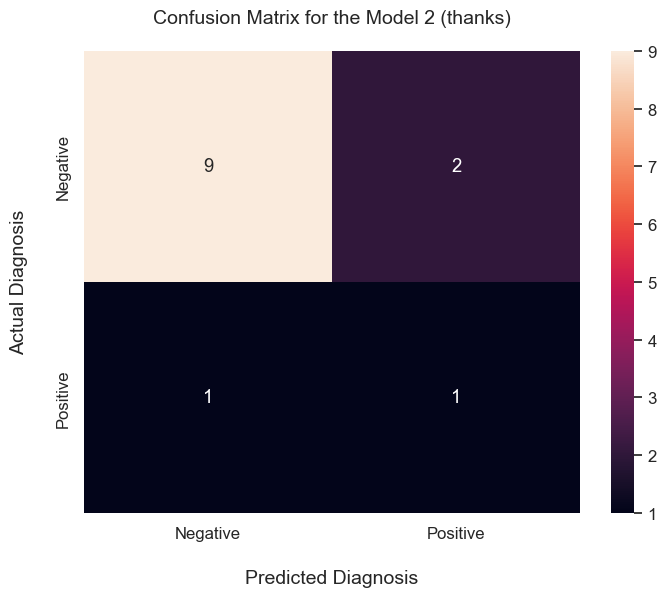

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[3], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 2 (thanks)", fontsize=14, pad=20)
 
plt.show()

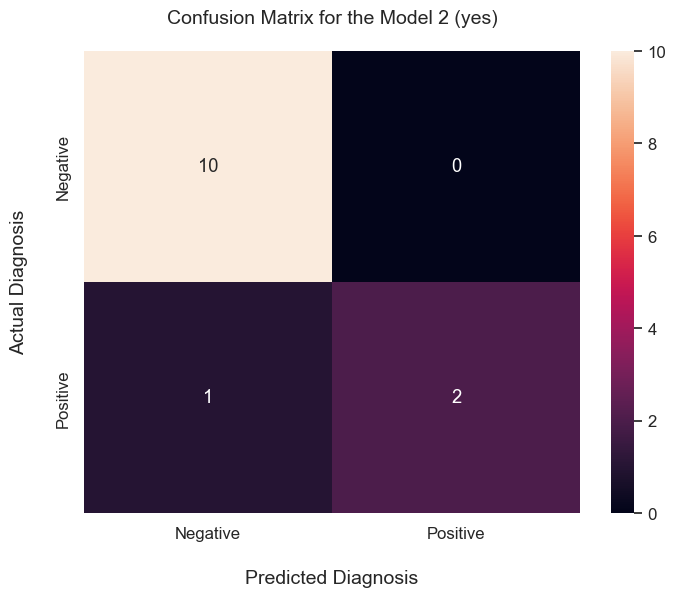

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(multilabel_confusion_matrix(ytrue,yhat)[4], annot=True, fmt='d', )

ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the Model 2 (yes)", fontsize=14, pad=20)
 
plt.show()